# Imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate Synthetic Data

In [2]:
X = torch.linspace(0, 10, steps=25)
Y = 3 * X + 2 + torch.normal(0, 1, size=(25,)) # 3x + 2 + noise

X = X.view(-1, 1)
Y = Y.view(-1, 1)

print(X.shape, Y.shape)

torch.Size([25, 1]) torch.Size([25, 1])


# Model

In [3]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression(input_size=1, output_size=1)

# Loss Function and Optimizer

In [4]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training Loop

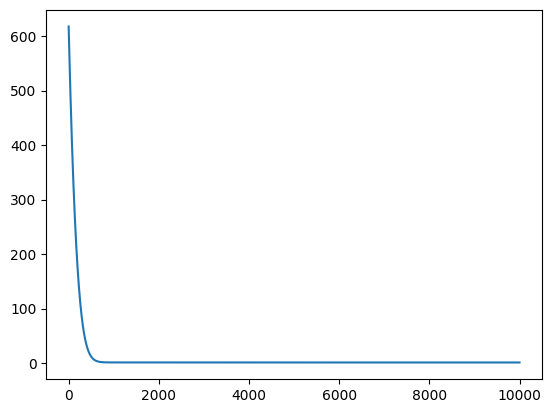

In [5]:
epochs = 10000
losses = []

for epoch in range(epochs):
    y_hat = model(X)
    loss = criterion(y_hat, Y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

plt.plot(losses)
plt.show()

# Verify Learned Parameters

In [6]:
list(model.parameters())

[Parameter containing:
 tensor([[2.9807]], requires_grad=True),
 Parameter containing:
 tensor([2.1501], requires_grad=True)]

# Visualizations

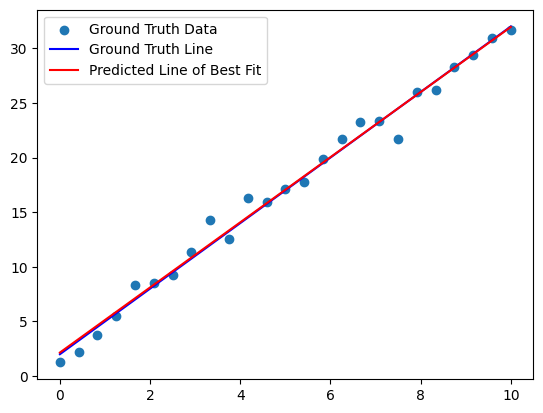

In [ ]:
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X, Y, label='Ground Truth Data')
plt.plot(X, 3*X+2, color='blue', label='Ground Truth Line')
plt.plot(X, y_pred, color='red', label='Predicted Line of Best Fit')

plt.legend()
plt.show()